In [61]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

In [62]:
df = yf.download('AAPL',start='2012-01-01',end='2024-09-12')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402626,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469279,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607717,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719305,394024400
...,...,...,...,...,...,...
2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400
2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48423000
2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000


In [63]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2555

In [64]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.93702248],
       [0.93340046],
       [0.94451548]])

In [65]:
train_data = scaled_data[0:training_data_len, : ]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

In [66]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [67]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2495, 60, 1)

In [68]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [70]:
model.fit(x_train,y_train, batch_size=10, epochs=1)

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0027


In [71]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [72]:
x_test = np.array(x_test)

In [73]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [74]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [75]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.307692728072498

C:\Users\hp\AppData\Local\Temp\ipykernel_1880\1964688370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


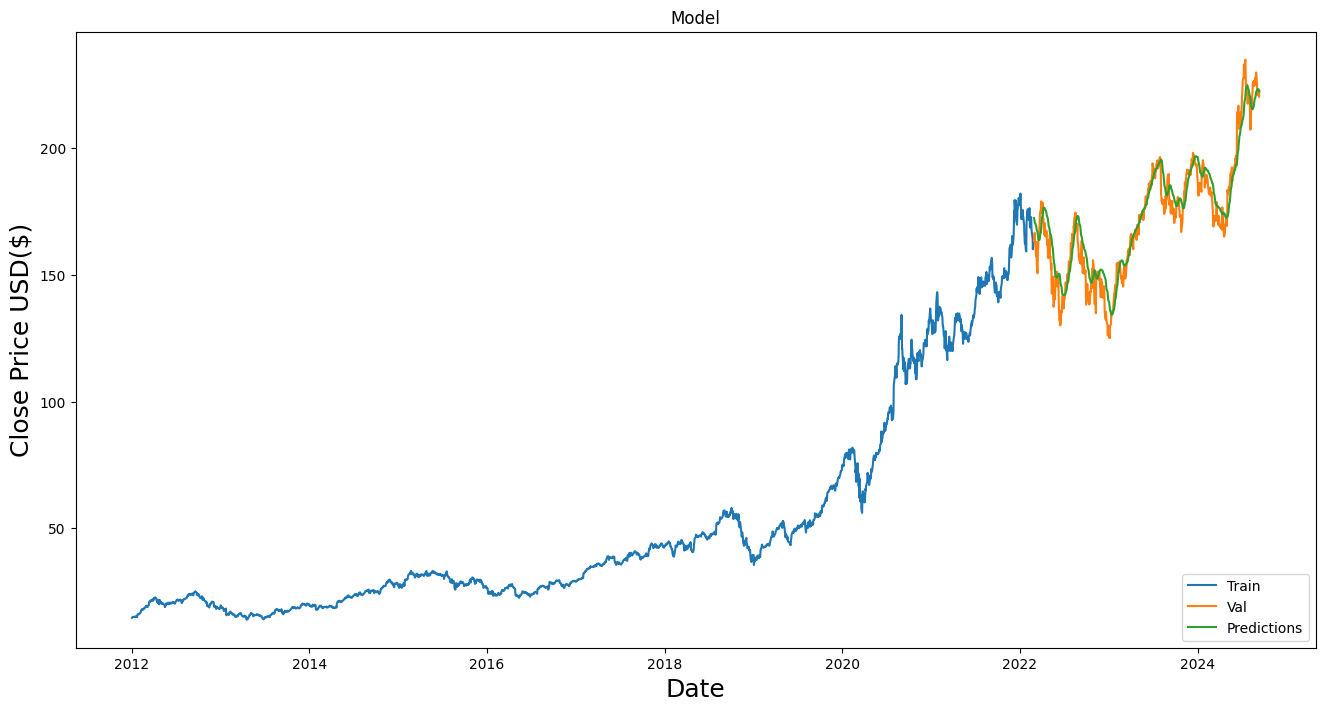

In [76]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [77]:
valid

,Close,Predictions
Date,,
2022-02-28,165.119995,172.381348
2022-03-01,163.199997,171.750351
2022-03-02,166.559998,171.134338
2022-03-03,166.229996,170.662811
2022-03-04,163.169998,170.309296
...,...,...
2024-09-05,222.380005,223.296005
2024-09-06,220.820007,223.211426
2024-09-09,220.910004,222.986893


In [78]:
apple_quote = yf.download('AAPL',start='2012-01-01',end='2019-12-17')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[68.503365]]


In [79]:

apple_quote2 = yf.download('AAPL',start='2024-09-10',end='2024-09-11')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed

Date
2024-09-10    220.110001
Name: Close, dtype: float64


In [80]:
model.save('model.h5')

In [81]:
import joblib
joblib.dump(scaler,'scaler.lb')

['scaler.lb']